In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

import matplotlib.pyplot as plt


df = pd.read_csv("FoodieX.csv")
df

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes
...,...,...,...,...,...,...,...,...,...,...
2014,ID_4366,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",$40.00,$0.00,-,-,-,30 minutes
2015,ID_319,39.133719,-85.503020,"Awadhi, Bihari",$40.00,$99.00,4.1,118,91,30 minutes
2016,ID_3104,39.662987,-85.950894,"Fast Food, Beverages",$10.00,$50.00,NEW,-,-,30 minutes
2017,ID_4396,39.301765,-85.662768,"Kebab, Fast Food",$10.00,$50.00,-,-,-,30 minutes


In [2]:
# Fixing data

binary = OneHotEncoder()
newPlace = binary.fit_transform(df["Rating"].values.reshape(-1,1)).toarray()

df["No_Rating"] = newPlace[:,0]

df["New"] = np.where(df["Rating"]!= 'NEW', False, True)
df["Opening_Soon"] = np.where(df["Rating"]!= 'Opening Soon', False, True)

df

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,No_Rating,New,Opening_Soon
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes,0.0,False,False
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes,0.0,False,False
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes,0.0,False,False
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes,0.0,False,False
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,ID_4366,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",$40.00,$0.00,-,-,-,30 minutes,1.0,False,False
2015,ID_319,39.133719,-85.503020,"Awadhi, Bihari",$40.00,$99.00,4.1,118,91,30 minutes,0.0,False,False
2016,ID_3104,39.662987,-85.950894,"Fast Food, Beverages",$10.00,$50.00,NEW,-,-,30 minutes,0.0,True,False
2017,ID_4396,39.301765,-85.662768,"Kebab, Fast Food",$10.00,$50.00,-,-,-,30 minutes,1.0,False,False


In [3]:
# Fixing the data
df.replace('-', np.nan, inplace=True)
df.replace('NEW', np.nan, inplace=True)
df.replace('Opening Soon', np.nan, inplace=True)

charDollar = ["$", ",00",",20"," minutes"]
for char in charDollar:
    df['Average_Cost'] = df['Average_Cost'].str.replace(char, '')
    df['Minimum_Order'] = df['Minimum_Order'].str.replace(char, '')
    df['Cook_Time'] = df['Cook_Time'].str.replace(char, '')

df

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,No_Rating,New,Opening_Soon
0,ID_6321,39.262605,-85.837372,"Fast Food, Rolls, Burger, Salad, Wraps",20.00,50.00,3.5,12,4,30,0.0,False,False
1,ID_2882,39.775933,-85.740581,"Ice Cream, Desserts",10.00,50.00,3.5,11,4,30,0.0,False,False
2,ID_1595,39.253436,-85.123779,"Italian, Street Food, Fast Food",15.00,50.00,3.6,99,30,65,0.0,False,False
3,ID_5929,39.029841,-85.332050,"Mughlai, North Indian, Chinese",25.00,99.00,3.7,176,95,30,0.0,False,False
4,ID_6123,39.882284,-85.517407,"Cafe, Beverages",20.00,99.00,3.2,521,235,65,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,ID_4366,39.624978,-85.189212,"North Indian, Pizza, Burger, Continental",40.00,0.00,NaN,NaN,NaN,30,1.0,False,False
2015,ID_319,39.133719,-85.503020,"Awadhi, Bihari",40.00,99.00,4.1,118,91,30,0.0,False,False
2016,ID_3104,39.662987,-85.950894,"Fast Food, Beverages",10.00,50.00,NaN,NaN,NaN,30,0.0,True,False
2017,ID_4396,39.301765,-85.662768,"Kebab, Fast Food",10.00,50.00,NaN,NaN,NaN,30,1.0,False,False


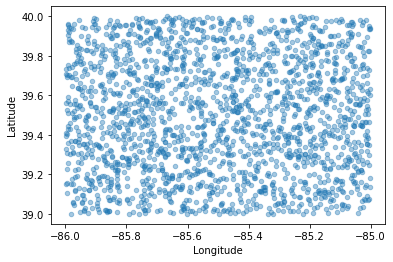

In [4]:
#Scatter plot

df.plot(kind="scatter", x="Longitude", y="Latitude", alpha = 0.4)
plt.show()

In [5]:
df["Rating"] = np.array(df["Rating"], dtype=np.float32)
df["Votes"] = np.array(df["Votes"], dtype=np.float32)
df["Average_Cost"] = np.array(df["Average_Cost"], dtype=np.float32)
df["Minimum_Order"] = np.array(df["Minimum_Order"], dtype=np.float32)
df["Cook_Time"] = np.array(df["Cook_Time"], dtype=np.float32)
df["Reviews"] = np.array(df["Reviews"], dtype=np.float32)

df["Cook_Time"].describe()


count    2019.000000
mean       36.921745
std        11.804334
min        10.000000
25%        30.000000
50%        30.000000
75%        45.000000
max       120.000000
Name: Cook_Time, dtype: float64

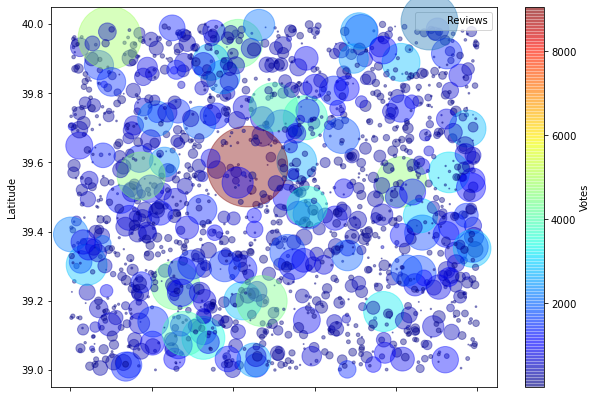

In [6]:
# Analysis #1 Trending Restaurants

df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=df["Reviews"], label="Reviews",
    c="Votes", cmap=plt.get_cmap("jet"),   
    colorbar=True, alpha=0.4, figsize=(10,7))

plt.legend()
plt.show()

# Conclusion #1 The most successful restaurant with the highest number of reviews and votes is located in the center
# The big circles are the restaurants that have a big piece of the market and probably have the highest number of orders.
# pick up zones should be close to these restaurants.

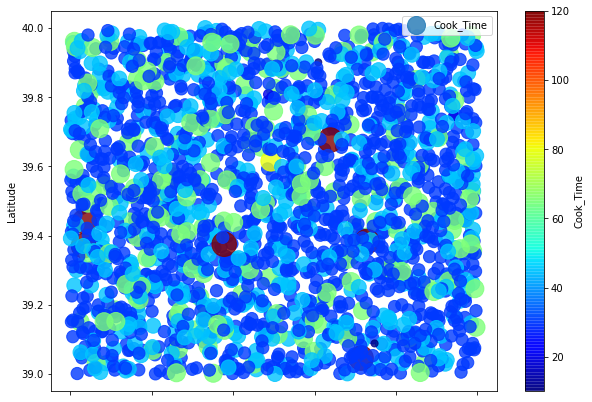

In [19]:
# Analysis #2 Cook Time

df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=df["Cook_Time"]*5, label="Cook_Time",
    c="Cook_Time", cmap=plt.get_cmap("jet"),   
    colorbar=True, alpha=0.8, figsize=(10,7))

plt.legend()
plt.show()

# Conclusion #2 Base on the location of the restaurants and the cooking time, zones with mostly blue and light blue have the
# shortest cooking times therefore drivers can start heading into these restaurants as soon as orders are placed. On the other
# hand if restaurants have red to yellow drivers can make other deliveries before heading to these restaurants avoiding 
# unnecessary wait times. Pick up zones should be in areas dominated by blue.

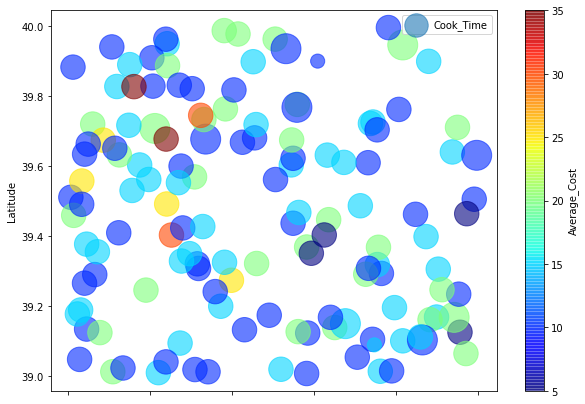

In [15]:
# Analysis #3 New and Opennig restaurants

df1 = df[df.New == True]
df2 = df[df.Opening_Soon ==True]

df3 = pd.concat([df1, df2])

df3.plot(kind="scatter", x="Longitude", y="Latitude",
    s=df3["Cook_Time"]*20, label="Cook_Time",
    c="Average_Cost", cmap=plt.get_cmap("jet"),   
    colorbar=True, alpha=0.6, figsize=(10,7))

plt.legend()
plt.show()

# Conclusion #3 New and Opening Soon restaurants exhibit a high cooking times. These restaurants can change over time depending
# on the success they might have. It can be observed that most of these restaurants are located in the upper left area. Prices 
# these new restaurants seem relatively low except for a few exceptions. Therefore, if popularity of some of these restaurants
#increase there can be a higher number of orders that can affect our delivery system. 

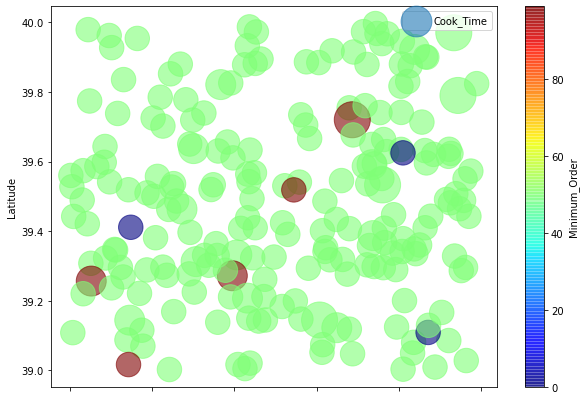

In [25]:
# Analysis #4 No rating restaurants

df4 = df[df.No_Rating == 1]

df4.plot(kind="scatter", x="Longitude", y="Latitude",
    s=df4["Cook_Time"]*20, label="Cook_Time",
    c="Minimum_Order", cmap=plt.get_cmap("jet"),   
    colorbar=True, alpha=0.6, figsize=(10,7))

plt.legend()
plt.show()

# Conclusion #4 No rating restaurants that are not in the New or Opening soon are locals that have been working for some time
# yet they do not have a rating or votes and reviews, so most of these placing have not been performing well. It can be seen 
# that most of these places have a high minimum order. It is possible for these restaurants to perform better if the minimum 
# is decreased maybe. But for FoodieX these restaurants will have a lower priority than restaurants than with high ratings, 
# reviews and votes.